In [ ]:
%pip install matplotlib

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
import os
import json
import requests
from PIL import Image
from io import BytesIO

In [11]:
file_path = './Export v2 project - Gore-things - 6_26_2024.ndjson'

with open(file_path, 'r') as file:
    lines = file.readlines()
    data = [json.loads(line) for line in lines]

In [16]:
data

[{'data_row': {'id': 'clxsndekg00030706e8s0vh0r',
   'external_id': '00003-2732446396.png',
   'row_data': 'https://storage.labelbox.com/clxsn84if0ogq07vp94as0urf%2F2ba282dc-4780-46fe-d540-b185f8184c1e-00003-2732446396.png?Expires=1719423139179&KeyName=labelbox-assets-key-3&Signature=s_jumelGvp3XJLCV3g_GAlLhAM0',
   'details': {'dataset_id': 'clxsna30v01rh07597tq7ylab',
    'dataset_name': 'Gore-Things',
    'created_at': '2024-06-24T07:19:34.803+00:00',
    'updated_at': '2024-06-24T07:19:36.100+00:00',
    'last_activity_at': '2024-06-25T15:14:56.715+00:00',
    'created_by': 'ariqtazakka@gmail.com'}},
  'media_attributes': {'height': 512,
   'width': 512,
   'asset_type': 'image',
   'mime_type': 'image/png',
   'exif_rotation': '1'},
  'attachments': [],
  'metadata_fields': [],
  'projects': {'clxsnh6nk0oim07vp0blr515y': {'name': 'Gore-things',
    'labels': [{'label_kind': 'Default',
      'version': '1.0.0',
      'id': 'clxszskv90ees07ek2jiv18se',
      'label_details': {'creat

In [18]:
def extract_urls(records):
    photo_urls = []
    mask_urls = []
    found = False

    def search_annotations(d):
        nonlocal found, mask_urls
        if isinstance(d, dict):
            if 'annotations' in d:
                found = True
                annotations = d['annotations']
                if 'objects' in annotations:
                    for obj in annotations['objects']:
                        if 'mask' in obj and 'url' in obj['mask']:
                            mask_urls.append(obj['mask']['url'])
                            #print(f"Record {i} - Mask URL found: {obj['mask']['url']}")
            else:
                for k, v in d.items():
                    search_annotations(v)
        elif isinstance(d, list):
            for item in d:
                search_annotations(item)
    
    for record in records:
        if 'data_row' in record:
            data_row = record['data_row']
            if 'row_data' in data_row:
                photo_urls.append(data_row['row_data'])
        search_annotations(record)

    return photo_urls, mask_urls

photo_urls, mask_urls = extract_urls(data)

In [19]:
mask_urls

['https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxszu23t000l356swtoj1tga/index/1/mask',
 'https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxszuvt2000p356sgrok0g1w/index/1/mask',
 'https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxszvlsg000t356sgc8swlgq/index/1/mask',
 'https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxszx26z0014356soa95uvb0/index/1/mask',
 'https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxszxtxp0019356shhykainx/index/1/mask',
 'https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxszylph001e356sa362p574/index/1/mask',
 'https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxszzr0w001i356sd9b75se0/index/1/mask',
 'https://api.labelbox.com/api/v1/projects/clxsnh6nk0oim07vp0blr515y/annotations/clxt00hw5001m356s0tdjy9yp/index/1/mask',
 'https://api.labelbox.c

In [21]:
def download_images_and_masks(image_urls, mask_urls, cookies, image_folder='images', mask_folder='masks'):
    # Create directories if they don't exist
    os.makedirs(image_folder, exist_ok=True)
    os.makedirs(mask_folder, exist_ok=True)

    headers = {
        'Cookie': cookies
    }

    # Download and save images and masks
    for i, (image_url, mask_url) in enumerate(zip(image_urls, mask_urls)):
        try:
            image_response = requests.get(image_url, headers=headers)
            mask_response = requests.get(mask_url, headers=headers)

            image = Image.open(BytesIO(image_response.content))
            mask = Image.open(BytesIO(mask_response.content))

            # Save images and masks
            image_path = os.path.join(image_folder, f'{i+1}.png')
            mask_path = os.path.join(mask_folder, f'{i+1}.png')

            image.save(image_path)
            mask.save(mask_path)

            print(f'Downloaded and saved Image {i+1} and Mask {i+1}')
        except UnidentifiedImageError as e:
            print(f"Skipping file due to error: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")

# Replace 'YOUR_COOKIES_HERE' with your actual cookies
cookies = '_ga=GA1.2.349679712.1719213168; _gid=GA1.2.1097835898.1719213169; _mkto_trk=id:622-PVG-762&token:_mch-labelbox.com-1719213174259-59219; _gcl_au=1.1.1052628575.1719213175; _biz_uid=0829540ab23644cfe78fa6047a50f1f6; ajs_anonymous_id=bce9dd16-1ce0-4b67-aa3f-e0fec80a4b32; intercom-id-pvt8f1fs=173bde18-253c-40b6-a3fc-1b905ca4cc38; intercom-device-id-pvt8f1fs=50661c0c-404d-4435-936e-b1c222b54ff8; ajs_user_id=clxsn84ix0ogr07vpg1rq7jcl; ajs_group_id=clxsn84if0ogq07vp94as0urf; _biz_flagsA=%7B%22Version%22%3A1%2C%22ViewThrough%22%3A%221%22%2C%22XDomain%22%3A%221%22%2C%22Frm%22%3A%221%22%2C%22Mkto%22%3A%221%22%7D; _fbp=fb.1.1719234154997.802383613529098061; lb-id=%7B%22userId%22%3A%22clxsn84ix0ogr07vpg1rq7jcl%22%2C%22organizationId%22%3A%22clxsn84if0ogq07vp94as0urf%22%7D; _ga_1FZYYW6NYV=GS1.1.1719321763.3.0.1719321763.60.0.0; lb-auth=s%3Ao3RkwUWuyQZs8risI1NokutnpjZNxCWt.5ZadV8uBfv4fvmUSkobF%2Fgxb0sUSZf8ZnbCvOzr1UHU; bGFiZWxib3guY29t-_lr_hb_-4ck4ql%2Fmy-app={%22heartbeat%22:1719336656205}; bGFiZWxib3guY29t-_lr_tabs_-4ck4ql%2Fmy-app={%22sessionID%22:0%2C%22recordingID%22:%225-6d4fa1df-c921-41f2-b5a1-2d7d248e4b7c%22%2C%22webViewID%22:null%2C%22lastActivity%22:1719336702962}; _uetsid=d8daa5e033bd11efa0dfa5908ec56fc6; _uetvid=3aa2c41032f011efb3768341a8ac73be; _clck=1exyte7%7C2%7Cfmy%7C0%7C1636; _clsk=hvxwgi%7C1719407596826%7C1%7C1%7Cu.clarity.ms%2Fcollect; analytics_session_id=1719407600833; _rdt_uuid=1719213173241.1c0b5346-b411-4108-ac73-8faa2e97d522; _hp2_ses_props.3649444639=%7B%22r%22%3A%22https%3A%2F%2Fwww.google.com%2F%22%2C%22ts%22%3A1719407595312%2C%22d%22%3A%22labelbox.com%22%2C%22h%22%3A%22%2F%22%7D; analytics_session_id.last_access=1719407676191; _hp2_id.3649444639=%7B%22userId%22%3A%225263879054929712%22%2C%22pageviewId%22%3A%223574331656524423%22%2C%22sessionId%22%3A%225804762578399753%22%2C%22identity%22%3A%22clxsn84ix0ogr07vpg1rq7jcl%22%2C%22trackerVersion%22%3A%224.0%22%2C%22identityField%22%3Anull%2C%22isIdentified%22%3A1%7D; intercom-session-pvt8f1fs=b3ZvME05MDVHdUtlRWkwaGNKYlIxdWRKUW9RNXNyaGJRMkV3Z3FnaGlRcmkvaENIWGJHTlljTEhoN2QzR2lubC0tUGFPQ3JjdnVtTkZqanRRR21iZGg0dz09--4008f6cc1e2587754c592d7ada655bfcd16dd692; _biz_nA=126; _biz_pendingA=%5B%5D'

# Download and save images and masks
download_images_and_masks(photo_urls, mask_urls, cookies)

Downloaded and saved Image 1 and Mask 1
Downloaded and saved Image 2 and Mask 2
Downloaded and saved Image 3 and Mask 3
Downloaded and saved Image 4 and Mask 4
Downloaded and saved Image 5 and Mask 5
Downloaded and saved Image 6 and Mask 6
Downloaded and saved Image 7 and Mask 7
Downloaded and saved Image 8 and Mask 8
Downloaded and saved Image 9 and Mask 9
Downloaded and saved Image 10 and Mask 10
Downloaded and saved Image 11 and Mask 11
Downloaded and saved Image 12 and Mask 12
Downloaded and saved Image 13 and Mask 13
Downloaded and saved Image 14 and Mask 14
Downloaded and saved Image 15 and Mask 15
Downloaded and saved Image 16 and Mask 16
Downloaded and saved Image 17 and Mask 17
Downloaded and saved Image 18 and Mask 18
Downloaded and saved Image 19 and Mask 19
Downloaded and saved Image 20 and Mask 20


## Model Declaration

In [28]:
image_folder = './images/'
mask_folder = './masks/'
img_size = (128, 128)

def load_image_and_mask(image_path, mask_path, img_size):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, img_size)
    
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, img_size)
    
    image = tf.cast(image, tf.float32) / 255.0
    mask = tf.cast(mask, tf.float32) / 255.0
    mask = tf.where(mask > 0, 1.0, 0.0)
    
    return image, mask


In [29]:
def load_dataset(image_folder, mask_folder, img_size):
    image_paths = sorted([os.path.join(image_folder, fname) for fname in os.listdir(image_folder)])
    mask_paths = sorted([os.path.join(mask_folder, fname) for fname in os.listdir(mask_folder)])
    
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
    
    def _load_and_augment(image_path, mask_path):
        image, mask = load_image_and_mask(image_path, mask_path, img_size)
        
        if tf.random.uniform(()) > 0.5:
            image = tf.image.flip_left_right(image)
            mask = tf.image.flip_left_right(mask)
        
        if tf.random.uniform(()) > 0.5:
            image = tf.image.flip_up_down(image)
            mask = tf.image.flip_up_down(mask)
        
        if tf.random.uniform(()) > 0.5:
            image = tf.image.rot90(image)
            mask = tf.image.rot90(mask)
        
        return image, mask
    
    dataset = dataset.map(_load_and_augment, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

train_dataset = load_dataset(image_folder, mask_folder, img_size)
train_dataset = train_dataset.batch(16).prefetch(tf.data.AUTOTUNE)


In [34]:
image_test_folder = './image_test/'
mask_test_folder = './masks_test/'
img_size = (128, 128)

test_dataste = load_dataset(image_test_folder, mask_test_folder, img_size)
test_dataset = test_dataste.batch(16).prefetch(tf.data.AUTOTUNE)

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    
    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    
    # Bottleneck
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
    
    # Decoder
    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    
    u8 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c8)
    
    u9 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c9)
    
    outputs = layers.Conv2D(output_channels, (1, 1), activation='softmax')(c9)
    
    model = models.Model(inputs, outputs)
    return model

model = unet_model(output_channels=2)  # Assuming binary segmentation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
history = model.fit(train_dataset, epochs=40, validation_data=test_dataset)


Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step - accuracy: 0.7092 - loss: 0.4546 - val_accuracy: 0.8149 - val_loss: 0.3821
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step - accuracy: 0.7839 - loss: 0.4464 - val_accuracy: 0.8609 - val_loss: 0.3718
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 0.8136 - loss: 0.4485 - val_accuracy: 0.8970 - val_loss: 0.4033
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 446ms/step - accuracy: 0.8268 - loss: 0.4528 - val_accuracy: 0.8792 - val_loss: 0.3824
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 0.8326 - loss: 0.4385 - val_accuracy: 0.9075 - val_loss: 0.3565
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step - accuracy: 0.8456 - loss: 0.4222 - val_accuracy: 0.9144 - val_loss: 0.3408
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step - accuracy: 0.8404 - loss: 0.4139 - val_accuracy: 0.9126 - val_loss: 0.3052
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.8375 - loss: 0.4057 - val_accuracy: 0.8961 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


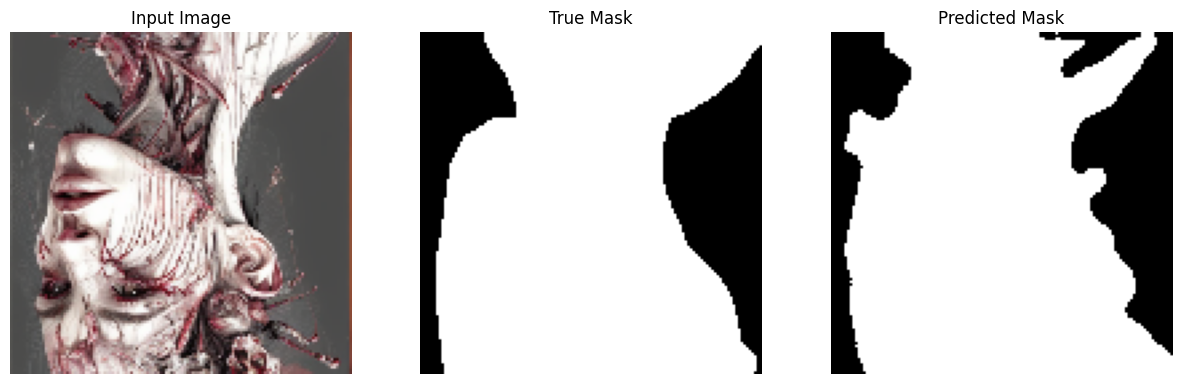

In [40]:
def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        if display_list[i].shape[-1] == 1:  # If the image has a single channel
            plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap='gray')
        else:
            plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

for image, mask in test_dataset.take(1):
    pred_mask = model.predict(image)
    pred_mask = tf.argmax(pred_mask, axis=-1)  # Convert prediction to class indices
    pred_mask = tf.expand_dims(pred_mask, axis=-1)  # Expand dimensions to match (height, width, channels)
    display([image[0], mask[0], pred_mask[0]])


In [ ]:
import os
import matplotlib.pyplot as plt

def load_image(image_path, img_size):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

def display_single(image, pred_mask):
    plt.figure(figsize=(10, 5))
    title = ['Input Image', 'Predicted Mask']
    
    plt.subplot(1, 2, 1)
    plt.title(title[0])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(title[1])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask), cmap='gray')
    plt.axis('off')
    
    plt.show()

def process_and_display_predictions(image_folder, model, img_size=(128, 128)):
    image_paths = sorted([os.path.join(image_folder, fname) for fname in os.listdir(image_folder)])
    
    for image_path in image_paths:
        image = load_image(image_path, img_size)
        image_expanded = tf.expand_dims(image, axis=0)  # Add batch dimension
        pred_mask = model.predict(image_expanded)
        pred_mask = tf.argmax(pred_mask, axis=-1)  # Convert prediction to class indices
        pred_mask = tf.expand_dims(pred_mask, axis=-1)  # Expand dimensions to match (height, width, channels)
        
        display_single(image, pred_mask[0])

# Example usage:
process_and_display_predictions('./Gore Dataset/Gore Dataset', model)


In [49]:
model.save('./Docker_Gore/segment_model.h5')

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

def load_image(image_path, img_size):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

def display_single(image, pred_mask, blurred_image):
    plt.figure(figsize=(15, 5))
    title = ['Input Image', 'Predicted Mask', 'Blurred Image']
    
    plt.subplot(1, 3, 1)
    plt.title(title[0])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title(title[1])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask), cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title(title[2])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(blurred_image))
    plt.axis('off')
    
    plt.show()

def blur_image_based_on_mask(image, pred_mask):
    # Convert mask to binary
    binary_mask = tf.cast(pred_mask > 0, tf.float32)
    binary_mask = binary_mask.numpy().astype(np.uint8)
    
    # Convert the image to numpy array
    image_np = image.numpy()
    
    # Apply Gaussian blur to the entire image
    blurred_image = cv2.GaussianBlur(image_np, (21, 21), 0)
    
    # Create a 3 channel binary mask
    binary_mask_3ch = np.repeat(binary_mask, 3, axis=-1)
    
    # Combine the original image and the blurred image using the mask
    combined_image = np.where(binary_mask_3ch == 1, blurred_image, image_np)
    
    return combined_image

def process_and_display_predictions(image_folder, model, img_size=(128, 128)):
    image_paths = sorted([os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.lower().endswith(('.jpg', '.jpeg', '.png'))])
    
    for image_path in image_paths:
        try:
            image = load_image(image_path, img_size)
            image_expanded = tf.expand_dims(image, axis=0)  # Add batch dimension
            pred_mask = model.predict(image_expanded)
            pred_mask = tf.argmax(pred_mask, axis=-1)  # Convert prediction to class indices
            pred_mask = tf.expand_dims(pred_mask, axis=-1)  # Expand dimensions to match (height, width, channels)
            
            # Blur the image based on the mask
            blurred_image = blur_image_based_on_mask(image, pred_mask[0])
            
            # Display the results
            display_single(image, pred_mask[0], blurred_image)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

# Example usage:
process_and_display_predictions('./Gore Dataset/Gore Dataset', model)
